In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
import geopandas as gpd


from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/pranavbidve/Documents/AML/Final Project/data/data.csv')
df.head()

,Unnamed: 0.1,StateAbbr,StateDesc,CountyName,CountyFIPS,TractFIPS,TotalPopulation,TotalPop18plus,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,...,D3APO,D4A,D4C,D4D,D5AR,D5AE,D5BR,D5BE,D5CR,D5CRI
0,0,NY,New York,Albany,36001,36001000100,2073,1507,12.2,28.7,...,0.081900,0.990340,0.990502,0.608667,0.052916,0.044596,0.027136,0.053216,0.049366,0.799864
1,1,NY,New York,Albany,36001,36001000201,3125,2314,10.9,24.9,...,0.128381,0.781805,0.781949,0.481601,0.041881,0.041040,0.022724,0.047323,0.042171,0.649692
2,2,NY,New York,Albany,36001,36001000202,2598,1756,10.8,26.7,...,0.043570,0.396692,0.396177,0.243470,0.020306,0.017547,0.009811,0.018994,0.018944,0.306940
3,3,NY,New York,Albany,36001,36001000301,3190,2189,11.1,26.6,...,0.105913,0.997369,0.990393,0.608603,0.046016,0.040432,0.016988,0.039075,0.042929,0.695568
4,4,NY,New York,Albany,36001,36001000302,3496,2956,6.3,22.2,...,0.010392,0.000000,0.000000,0.000000,0.001049,0.001796,0.000000,0.000000,0.081016,0.160011


In [3]:
df.drop(['Unnamed: 0.1', 'StateDesc' ,'StateAbbr', 'CountyFIPS', 'Geolocation', 'FUNCSTAT', 'MTFCC', 'GEOIDFQ', 'BLKGRPCE_y', 'TractFIPS'], axis = 1, inplace = True)
df.dropna(axis = 0, inplace = True)

In [4]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [5]:
n = len(df['CountyName'].unique())

In [6]:
features = [
    'ACCESS2_CrudePrev', 'ARTHRITIS_CrudePrev', 'DEPRESSION_CrudePrev',
    'DIABETES_CrudePrev', 'OBESITY_CrudePrev', 'DISABILITY_CrudePrev',
    'STROKE_CrudePrev', 'lon', 'lat'
]

In [7]:
final_df = df[features]
final_df

,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,DEPRESSION_CrudePrev,DIABETES_CrudePrev,OBESITY_CrudePrev,DISABILITY_CrudePrev,STROKE_CrudePrev,lon,lat
0,12.2,28.7,21.8,15.9,46.8,37.4,5.1,-73.736909,42.663755
5,4.8,40.6,17.1,13.7,28.4,38.5,6.4,-73.866842,42.702669
6,5.5,24.6,20.7,9.6,32.2,24.0,3.0,-73.805264,42.676874
8,11.6,28.6,22.1,15.9,44.2,38.2,5.2,-73.782428,42.670339
9,8.0,14.4,25.1,6.4,31.9,28.1,2.1,-73.786733,42.667008
...,...,...,...,...,...,...,...,...,...
5278,5.1,28.7,21.7,9.6,33.8,25.8,3.1,-78.385184,42.656563
5279,5.4,30.1,22.6,10.3,34.9,28.3,3.5,-78.369969,42.571349
5280,6.8,32.6,22.8,11.9,36.6,32.2,4.2,-78.181429,42.567357
5283,7.7,31.2,22.7,11.5,34.1,33.8,4.3,-77.076361,42.711954


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df)

In [9]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

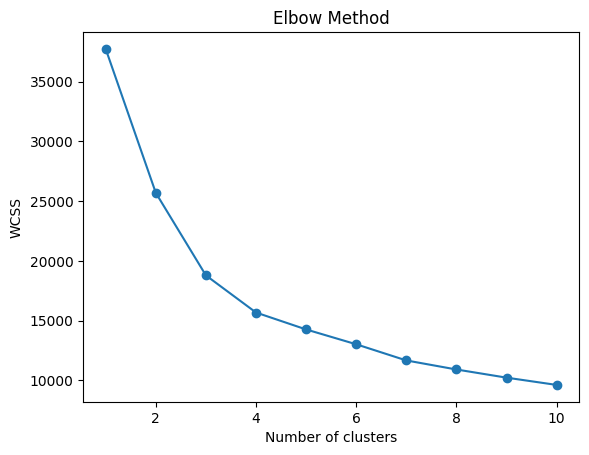

In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
optimal_k = 9  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

final_df['Cluster'] = clusters

high_risk_cluster = final_df[final_df['Cluster'] == 0]

/var/folders/_j/339x85hx3692z04svrrjjb380000gn/T/ipykernel_3885/454277104.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Cluster'] = clusters


In [17]:
final_df

,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,DEPRESSION_CrudePrev,DIABETES_CrudePrev,OBESITY_CrudePrev,DISABILITY_CrudePrev,STROKE_CrudePrev,lon,lat,Cluster
0,12.2,28.7,21.8,15.9,46.8,37.4,5.1,-73.736909,42.663755,1
5,4.8,40.6,17.1,13.7,28.4,38.5,6.4,-73.866842,42.702669,1
6,5.5,24.6,20.7,9.6,32.2,24.0,3.0,-73.805264,42.676874,6
8,11.6,28.6,22.1,15.9,44.2,38.2,5.2,-73.782428,42.670339,1
9,8.0,14.4,25.1,6.4,31.9,28.1,2.1,-73.786733,42.667008,7
...,...,...,...,...,...,...,...,...,...,...
5278,5.1,28.7,21.7,9.6,33.8,25.8,3.1,-78.385184,42.656563,4
5279,5.4,30.1,22.6,10.3,34.9,28.3,3.5,-78.369969,42.571349,4
5280,6.8,32.6,22.8,11.9,36.6,32.2,4.2,-78.181429,42.567357,1
5283,7.7,31.2,22.7,11.5,34.1,33.8,4.3,-77.076361,42.711954,1


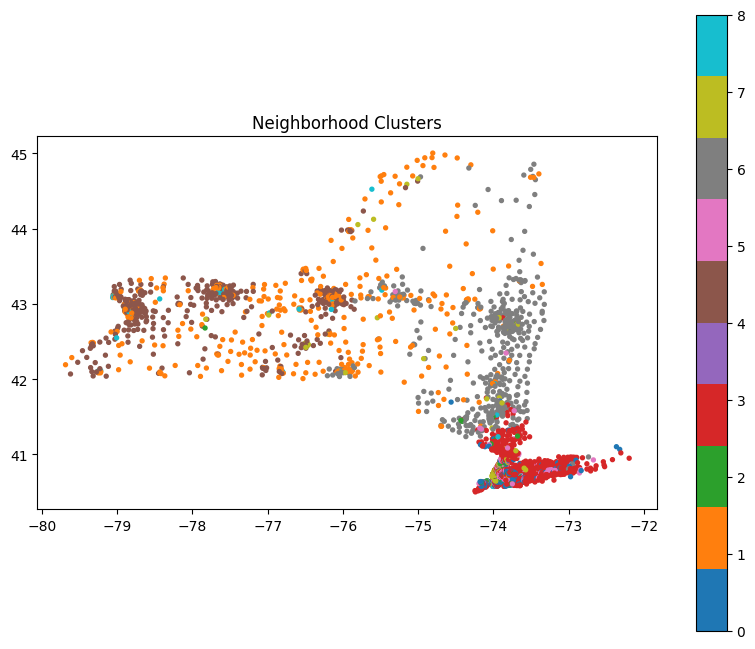

In [22]:
gdf = gpd.GeoDataFrame(final_df, geometry=gpd.points_from_xy(final_df['lon'], final_df['lat']))

gdf.plot(column='Cluster', cmap='tab10', legend=True, figsize=(10, 8), markersize=8)
plt.title('Neighborhood Clusters')
plt.show()

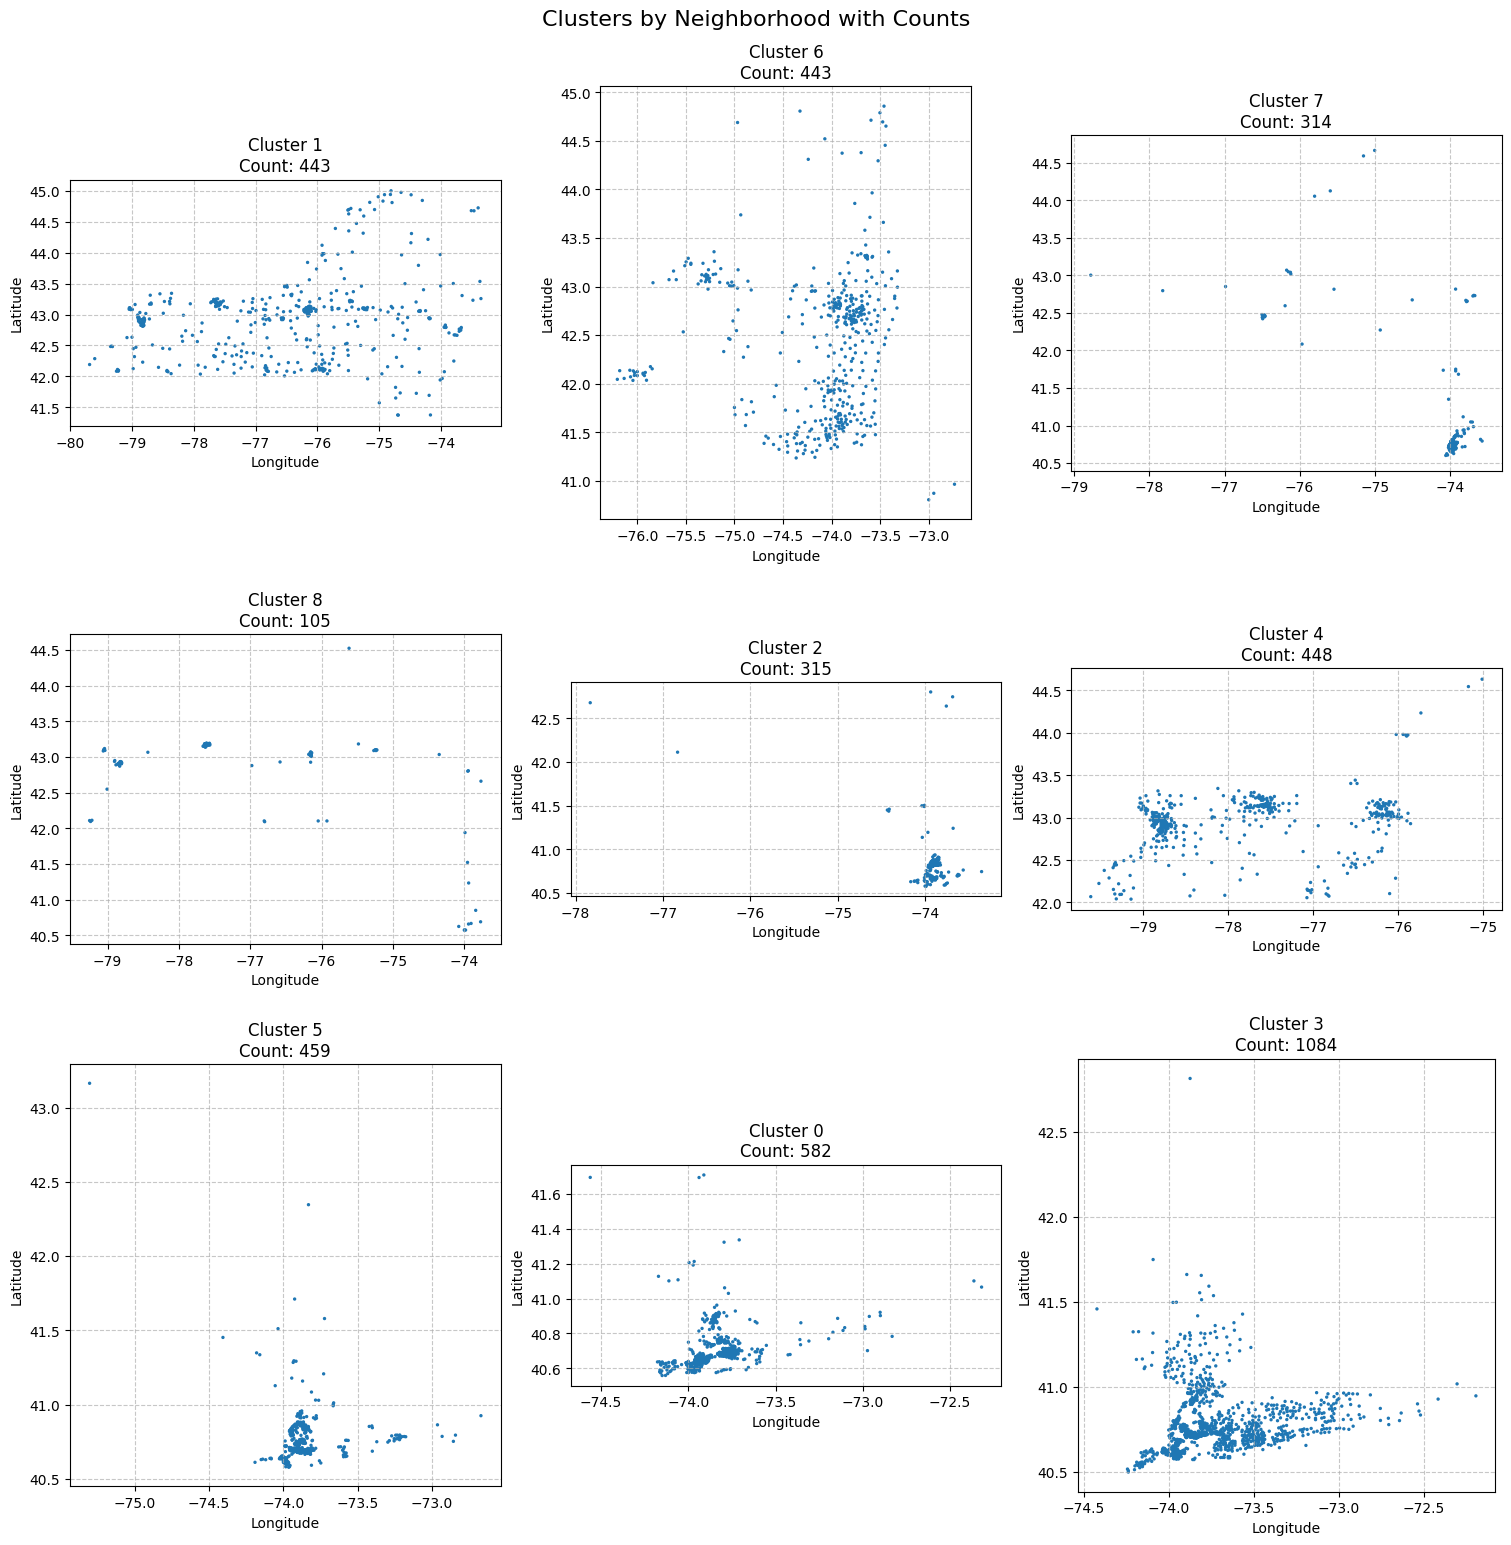

In [24]:
import matplotlib.pyplot as plt

unique_clusters = gdf['Cluster'].unique()

n_clusters = len(unique_clusters)
cols = 3  
rows = -(-n_clusters // cols) 

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), constrained_layout=True)

axes = axes.flatten()

for i, cluster in enumerate(unique_clusters):
    ax = axes[i]
    cluster_data = gdf[gdf['Cluster'] == cluster]
    cluster_data.plot(
        ax=ax,
        column='Cluster',
        cmap='tab10',
        legend=False,
        markersize=2
    )
    ax.set_title(f'Cluster {cluster}\nCount: {len(cluster_data)}', fontsize=12)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(visible=True, linestyle='--', alpha=0.7)  

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Clusters by Neighborhood with Counts', fontsize=16, y=1.02)

plt.show()
